In [1]:
from preamble import *
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn.externals.six'

## Introduction
### Why machine learning?
### Problems that machine learning can solve

### Knowing your task and knowing your data

### Why Python?

### Scikit-learn
#### Installing Scikit-learn

#### Essential Libraries and Tools

##### Jupyter Notebook

##### NumPy

In [ ]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

##### SciPy

In [ ]:
from scipy import sparse

# create a 2d NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

In [2]:
# convert the NumPy array to a SciPy sparse matrix in CSR format
# only the non-zero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))

NameError: name 'sparse' is not defined

In [3]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

NameError: name 'np' is not defined

##### matplotlib

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

NameError: name 'np' is not defined

##### pandas

In [5]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [6]:
# One of many possible ways to query the table:
# selecting all rows that have an age column greate than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


##### mglearn

#### Python2 versus Python3

#### Versions Used in this Book

In [7]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
pandas version: 1.0.4
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.13.0
scikit-learn version: 0.23.0


### A First Application: Classifying iris species
![sepal_petal](images/iris_petal_sepal.png)
#### Meet the data

In [8]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [9]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [11]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [12]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [14]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [15]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [17]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [18]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and testing data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [20]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [21]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### First things first: Look at your data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f3a990>,
      dtype=object)

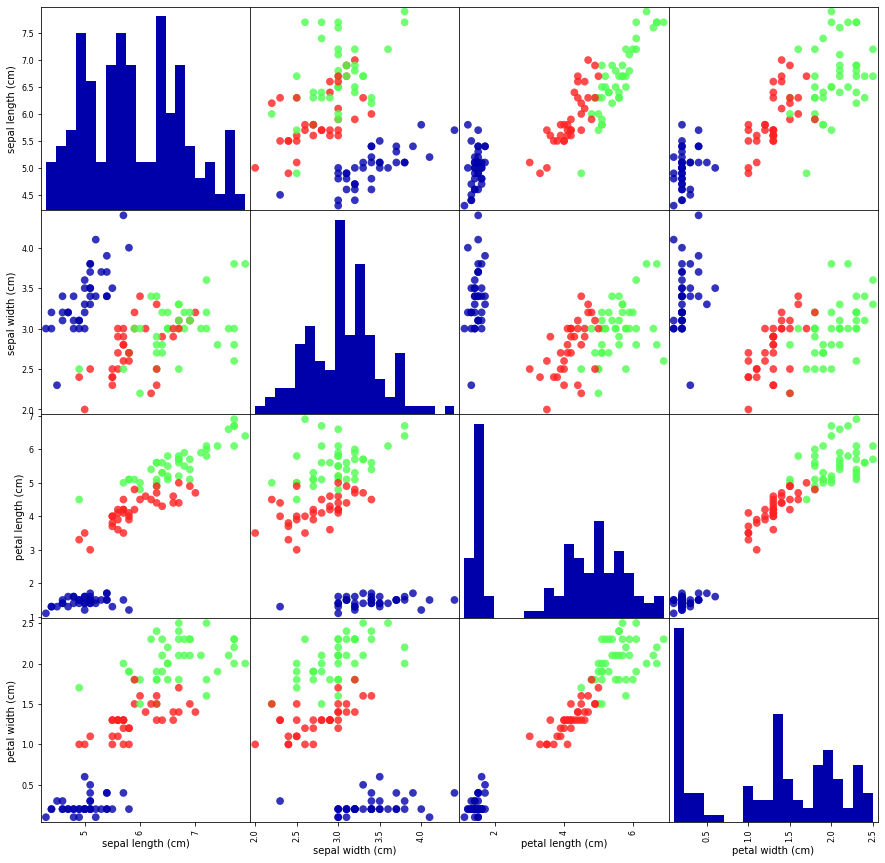

In [27]:
import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [23]:
X_train

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

In [25]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train

array([[ 1.54399532e-02, -1.19254753e-01,  2.25126850e-01,
         3.55797625e-01],
       [-9.98450310e-02, -1.04039491e+00,  1.13559562e-01,
        -2.98410911e-02],
       [ 1.05300481e+00, -1.19254753e-01,  9.50314227e-01,
         1.12707506e+00],
       [-1.36797986e+00,  3.41315328e-01, -1.39259884e+00,
        -1.31530348e+00],
       [ 1.16828980e+00,  1.11030287e-01,  7.27179649e-01,
         1.38416753e+00],
       [-1.02212490e+00,  1.03217045e+00, -1.22524790e+00,
        -8.01118523e-01],
       [-5.60984968e-01,  1.49274053e+00, -1.28103155e+00,
        -1.31530348e+00],
       [-1.02212490e+00, -2.42210516e+00, -1.65358660e-01,
        -2.86933568e-01],
       [ 7.07149859e-01, -1.19254753e-01,  9.50314227e-01,
         7.41436341e-01],
       [ 9.37719827e-01,  5.71600368e-01,  1.06188152e+00,
         1.64126001e+00],
       [ 1.30724937e-01, -1.96153508e+00,  6.71396005e-01,
         3.55797625e-01],
       [ 9.37719827e-01, -1.27067995e+00,  1.11766516e+00,
      

In [27]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

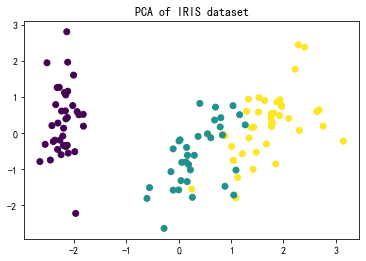

In [54]:
from sklearn.decomposition import PCA
#将特征数据从多维转化为2维数据，并画出数据分布情况
X_dr = PCA(2).fit_transform(X_train)
plt.scatter(X_dr[:,0],X_dr[:,1],c=y_train)
plt.title('PCA of IRIS dataset')
plt.show()

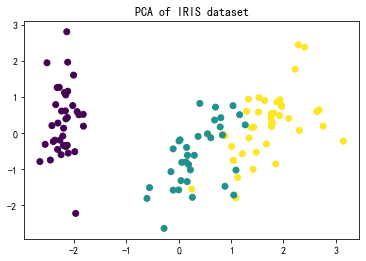

In [43]:
#调用PCA
pca = PCA(n_components=2)          #实例化，n_components=2表示降到2维
X_dr = pca.fit_transform(X_train)  
plt.scatter(X_dr[:,0],X_dr[:,1],c=y_train)
plt.title('PCA of IRIS dataset')
plt.show()                 #拟合模型

In [44]:
#探索降维后的数据
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([2.91466896, 0.9739909 ])

In [45]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.72216128, 0.24132364])

In [46]:
# 降维后信息保留多少
pca.explained_variance_ratio_.sum()

0.9634849217780719

#### 选择最好的n_components：累积可解释方差贡献率曲线

In [47]:
pca_1 = PCA().fit(X_train)
pca_1.explained_variance_ratio_    # 默认还是原来的特征数，没有降维

array([0.72216128, 0.24132364, 0.03203983, 0.00447525])

In [48]:
# 我们可以利用numpy中的cumsum进行累计求和
np.cumsum(pca_1.explained_variance_ratio_ )

array([0.72216128, 0.96348492, 0.99552475, 1.        ])

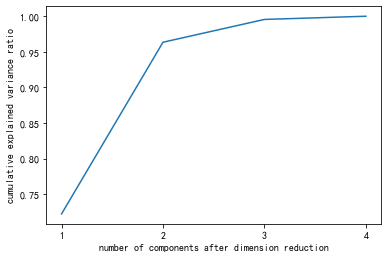

In [49]:
# 我们可以用这种方式来画图
pca_line = PCA().fit(X_train)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_)) 
plt.xticks([1,2,3,4])  
#这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction") 
plt.ylabel("cumulative explained variance ratio")
plt.show() # 从图中可以看出 降维到2或者3差别不大

#### 最大似然估计自选超参数

除了输入整数，n_components还有哪些选择呢？之前我们提到过，矩阵分解的理论发展在业界独树一帜，勤奋智慧的数学大神Minka, T.P.在麻省理工学院媒体实验室做研究时找出了让PCA用最大似然估计(maximum likelihood estimation)自选超参数的方法，输入“mle”作为n_components的参数输入，就可以调用这种方法。

In [51]:
pca_mle = PCA(n_components="mle") 
X_mle = pca_mle.fit_transform(X_train)
X_mle

array([[ 3.68829944e-01, -9.08750720e-02,  2.16529767e-01],
       [ 2.21418232e-01, -1.01450843e+00, -1.66580116e-01],
       [ 1.78740505e+00,  2.89367112e-01,  4.38875702e-02],
       [-2.36974355e+00, -1.94419421e-01,  5.82275915e-02],
       [ 1.81554310e+00,  5.54869071e-01,  1.44689294e-01],
       [-1.94322916e+00,  5.94360704e-01,  3.09695754e-01],
       [-2.12289165e+00,  1.15860840e+00, -2.54549769e-01],
       [-2.81736407e-01, -2.63465316e+00, -6.63822964e-03],
       [ 1.38237944e+00,  1.58026272e-01,  5.24273877e-02],
       [ 1.93493849e+00,  9.25168099e-01,  6.24184567e-01],
       [ 1.09040767e+00, -1.78725296e+00, -2.25372248e-01],
       [ 1.85287080e+00, -8.50164050e-01, -3.54218298e-01],
       [ 4.21209441e-02, -1.31375786e+00, -1.39264296e-01],
       [ 2.68416733e+00,  6.45621665e-01, -5.05664181e-01],
       [ 7.01894648e-01,  7.19774057e-01,  1.55142307e-01],
       [-2.16781017e-03, -1.56922700e+00, -1.14795083e-01],
       [ 1.21332482e+00, -5.70886175e-01

In [52]:
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说
#3个特征对应这么高的信息含量，并不需要去纠结于只保留2个特征，毕竟三个特征也可以可视化
pca_mle.explained_variance_ratio_.sum()

0.9955247516310362